# ***UK HOUSING DATA REVISTED WITH MORE FEATURE ENGINEERING***

**I have enhanced the housing prediction model by incorporating several new features engineered from existing variables. These additions aim to capture intricate patterns and spatial dependencies within the dataset, potentially leading to improved model accuracy.**

In [1]:
!pip install kaggle
!pip install -Uqq fastbook kaggle waterfallcharts treeinterpreter dtreeviz==1.4.1
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import fastbook
#fastbook.setup_book()
from fastbook import *
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from fastai.tabular.all import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG
import seaborn as sns
sns.set_style("whitegrid")

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.8 MB/s eta 0:00:00


The code below utilizes the `opencage` library to retrieve latitude and longitude coordinates for each unique location (Town/City, District, County combination) in the dataset. It defines a function `get_lat_long` that takes a row as input, constructs a location string, and uses the `OpenCageGeocode` object to fetch coordinates. The results are cached to avoid redundant API calls. Finally, the coordinates are merged back into the main dataframe (`df`) based on the location information.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/UkHousingPaid/UkHousing.csv', low_memory=False)

In [4]:
ge = pd.read_csv("/content/drive/MyDrive/uk_housing_with_coordinates.csv", low_memory=False)

In [5]:
ge

,Price,Town/City,District,County,year,month,region,latitude,longitude,type_D,type_F,type_S,type_T,Old,New,Freehold,Lease
0,11.512925,0.0,0.0,0.0,2004,7,0,53.496046,-2.517149,0,0,0,1,1,0,0,1
1,12.323856,1.0,1.0,1.0,2004,5,0,51.414351,-0.744992,0,0,1,0,1,0,1,0
2,12.206073,2.0,2.0,2.0,2004,5,1,51.501048,-0.128599,0,1,0,0,1,0,0,1
3,11.580584,3.0,3.0,3.0,2004,5,0,52.725798,-1.374138,0,0,1,0,1,0,1,0
4,11.951180,4.0,4.0,4.0,2004,5,0,53.726435,-1.714094,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11244669,12.072541,132.0,139.0,4.0,2017,2,0,53.794414,-1.548621,0,0,1,0,1,0,1,0
11244670,13.282686,187.0,139.0,4.0,2017,2,0,53.925980,-1.377634,1,0,0,0,1,0,1,0
11244671,12.520883,450.0,4.0,4.0,2017,2,0,53.646664,-1.782248,1,0,0,0,1,0,0,1
11244672,10.491274,245.0,140.0,4.0,2017,2,0,53.722923,-1.860487,0,0,0,1,1,0,1,0


In [6]:
df = pd.concat([df, ge[['latitude', 'longitude']]], axis=1)
df

,Transaction unique identifier,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type,Record Status - monthly file only,latitude,longitude
0,{48D289DD-63FC-4754-A843-D8F000B82AA4},100000,2004-07-16 00:00,T,N,L,LEIGH,WIGAN,GREATER MANCHESTER,A,A,53.496046,-2.517149
1,{DB439A65-BB00-48F6-BFDB-D8F00241B16E},225000,2004-05-28 00:00,S,N,F,BRACKNELL,BRACKNELL FOREST,BRACKNELL FOREST,A,A,51.414351,-0.744992
2,{2B50381C-A0BA-4EB0-A2C2-CE58DFE53D56},200000,2004-05-25 00:00,F,N,L,LONDON,LAMBETH,GREATER LONDON,A,A,51.501048,-0.128599
3,{C7DE3121-A9E4-4A83-967B-CE59229087B6},107000,2004-05-07 00:00,S,N,F,COALVILLE,NORTH WEST LEICESTERSHIRE,LEICESTERSHIRE,A,A,52.725798,-1.374138
4,{68AD601C-9DFB-4F12-A7BD-D1EA989B0FE5},155000,2004-05-28 00:00,D,N,F,CLECKHEATON,KIRKLEES,WEST YORKSHIRE,A,A,53.726435,-1.714094
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11244669,{4C4EE000-291A-1854-E050-A8C063054F34},175000,2017-02-20 00:00,S,N,F,LEEDS,LEEDS,WEST YORKSHIRE,A,A,53.794414,-1.548621
11244670,{4C4EE000-291B-1854-E050-A8C063054F34},586945,2017-02-15 00:00,D,N,F,WETHERBY,LEEDS,WEST YORKSHIRE,A,A,53.925980,-1.377634
11244671,{4C4EE000-291C-1854-E050-A8C063054F34},274000,2017-02-24 00:00,D,N,L,HUDDERSFIELD,KIRKLEES,WEST YORKSHIRE,A,A,53.646664,-1.782248
11244672,{4C4EE000-291D-1854-E050-A8C063054F34},36000,2017-02-22 00:00,T,N,F,HALIFAX,CALDERDALE,WEST YORKSHIRE,A,A,53.722923,-1.860487


In [7]:
print(df.isnull().sum())

Transaction unique identifier           0
Price                                   0
Date of Transfer                        0
Property Type                           0
Old/New                                 0
Duration                                0
Town/City                               0
District                                0
County                                  0
PPDCategory Type                        0
Record Status - monthly file only       0
latitude                             2610
longitude                            2610
dtype: int64


In [8]:
df = df.drop_duplicates()

In [9]:
df['date']=df['Date of Transfer']
df['type']=df['Property Type']
df['ppd']=df['PPDCategory Type']
df

,Transaction unique identifier,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type,Record Status - monthly file only,latitude,longitude,date,type,ppd
0,{48D289DD-63FC-4754-A843-D8F000B82AA4},100000,2004-07-16 00:00,T,N,L,LEIGH,WIGAN,GREATER MANCHESTER,A,A,53.496046,-2.517149,2004-07-16 00:00,T,A
1,{DB439A65-BB00-48F6-BFDB-D8F00241B16E},225000,2004-05-28 00:00,S,N,F,BRACKNELL,BRACKNELL FOREST,BRACKNELL FOREST,A,A,51.414351,-0.744992,2004-05-28 00:00,S,A
2,{2B50381C-A0BA-4EB0-A2C2-CE58DFE53D56},200000,2004-05-25 00:00,F,N,L,LONDON,LAMBETH,GREATER LONDON,A,A,51.501048,-0.128599,2004-05-25 00:00,F,A
3,{C7DE3121-A9E4-4A83-967B-CE59229087B6},107000,2004-05-07 00:00,S,N,F,COALVILLE,NORTH WEST LEICESTERSHIRE,LEICESTERSHIRE,A,A,52.725798,-1.374138,2004-05-07 00:00,S,A
4,{68AD601C-9DFB-4F12-A7BD-D1EA989B0FE5},155000,2004-05-28 00:00,D,N,F,CLECKHEATON,KIRKLEES,WEST YORKSHIRE,A,A,53.726435,-1.714094,2004-05-28 00:00,D,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11244669,{4C4EE000-291A-1854-E050-A8C063054F34},175000,2017-02-20 00:00,S,N,F,LEEDS,LEEDS,WEST YORKSHIRE,A,A,53.794414,-1.548621,2017-02-20 00:00,S,A
11244670,{4C4EE000-291B-1854-E050-A8C063054F34},586945,2017-02-15 00:00,D,N,F,WETHERBY,LEEDS,WEST YORKSHIRE,A,A,53.925980,-1.377634,2017-02-15 00:00,D,A
11244671,{4C4EE000-291C-1854-E050-A8C063054F34},274000,2017-02-24 00:00,D,N,L,HUDDERSFIELD,KIRKLEES,WEST YORKSHIRE,A,A,53.646664,-1.782248,2017-02-24 00:00,D,A
11244672,{4C4EE000-291D-1854-E050-A8C063054F34},36000,2017-02-22 00:00,T,N,F,HALIFAX,CALDERDALE,WEST YORKSHIRE,A,A,53.722923,-1.860487,2017-02-22 00:00,T,A


In [10]:
dep_var = 'Price'
df[dep_var] = np.log(df[dep_var])

In [11]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df

,Transaction unique identifier,Price,Date of Transfer,Property Type,Old/New,Duration,Town/City,District,County,PPDCategory Type,Record Status - monthly file only,latitude,longitude,date,type,ppd,year,month
0,{48D289DD-63FC-4754-A843-D8F000B82AA4},11.512925,2004-07-16 00:00,T,N,L,LEIGH,WIGAN,GREATER MANCHESTER,A,A,53.496046,-2.517149,2004-07-16,T,A,2004,7
1,{DB439A65-BB00-48F6-BFDB-D8F00241B16E},12.323856,2004-05-28 00:00,S,N,F,BRACKNELL,BRACKNELL FOREST,BRACKNELL FOREST,A,A,51.414351,-0.744992,2004-05-28,S,A,2004,5
2,{2B50381C-A0BA-4EB0-A2C2-CE58DFE53D56},12.206073,2004-05-25 00:00,F,N,L,LONDON,LAMBETH,GREATER LONDON,A,A,51.501048,-0.128599,2004-05-25,F,A,2004,5
3,{C7DE3121-A9E4-4A83-967B-CE59229087B6},11.580584,2004-05-07 00:00,S,N,F,COALVILLE,NORTH WEST LEICESTERSHIRE,LEICESTERSHIRE,A,A,52.725798,-1.374138,2004-05-07,S,A,2004,5
4,{68AD601C-9DFB-4F12-A7BD-D1EA989B0FE5},11.951180,2004-05-28 00:00,D,N,F,CLECKHEATON,KIRKLEES,WEST YORKSHIRE,A,A,53.726435,-1.714094,2004-05-28,D,A,2004,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11244669,{4C4EE000-291A-1854-E050-A8C063054F34},12.072541,2017-02-20 00:00,S,N,F,LEEDS,LEEDS,WEST YORKSHIRE,A,A,53.794414,-1.548621,2017-02-20,S,A,2017,2
11244670,{4C4EE000-291B-1854-E050-A8C063054F34},13.282686,2017-02-15 00:00,D,N,F,WETHERBY,LEEDS,WEST YORKSHIRE,A,A,53.925980,-1.377634,2017-02-15,D,A,2017,2
11244671,{4C4EE000-291C-1854-E050-A8C063054F34},12.520883,2017-02-24 00:00,D,N,L,HUDDERSFIELD,KIRKLEES,WEST YORKSHIRE,A,A,53.646664,-1.782248,2017-02-24,D,A,2017,2
11244672,{4C4EE000-291D-1854-E050-A8C063054F34},10.491274,2017-02-22 00:00,T,N,F,HALIFAX,CALDERDALE,WEST YORKSHIRE,A,A,53.722923,-1.860487,2017-02-22,T,A,2017,2


In [12]:
df['region'] = np.where(df['Town/City'] == 'LONDON', 1, 0)

### **Firstly, I've introduced squared terms for both longitude and latitude. This allows the model to account for potential non-linear relationships between these coordinates and house prices. For instance, the impact of distance from the city center might not be strictly linear; squaring these variables helps capture such nuances.**

### **Secondly, an interaction term between longitude and latitude has been added. This feature captures the combined effect of these coordinates, acknowledging that their influence on house prices might be interdependent rather than independent.**

In [13]:
df['Longitude_squared'] = df['longitude'] ** 2
df['Latitude_squared'] = df['latitude'] ** 2
df['Lon_Lat_interaction'] = df['longitude'] * df['latitude']

## **Finally, a crucial feature representing the distance of each property from London has been included. This was calculated using the Haversine formula, a method for determining distances between two points on a sphere given their longitudes and latitudes. Recognizing the significant influence of proximity to London on UK house prices, this feature is expected to be a strong predictor.**

In [14]:
# Define the coordinates for London
london_lat, london_lon = 51.5074, -0.1278

# Haversine function to calculate distance
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the Earth in km
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)
    a = np.sin(delta_phi / 2) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

# Create a new feature for distance from London
df['distance_from_london'] = df.apply(lambda row: haversine(row['latitude'], row['longitude'], london_lat, london_lon), axis=1)

### **have further enriched the model by incorporating trigonometric transformations of the "month" variable, specifically by adding Month_sin and Month_cos features. These features are created by applying the sine and cosine functions to the month number, respectively.**

In [15]:
df['Month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

### **This transformation serves to capture the cyclical nature of monthly patterns in house prices. Instead of treating months as discrete categories, the sine and cosine functions represent them as points on a circle. This allows the model to recognize the cyclical trends, such as potential price increases in summer months and decreases during winter, without imposing artificial linearity.**

In [16]:
df.columns

Index(['Transaction unique identifier', 'Price', 'Date of Transfer',
       'Property Type', 'Old/New', 'Duration', 'Town/City', 'District',
       'County', 'PPDCategory Type', 'Record Status - monthly file only',
       'latitude', 'longitude', 'date', 'type', 'ppd', 'year', 'month',
       'region', 'Longitude_squared', 'Latitude_squared',
       'Lon_Lat_interaction', 'distance_from_london', 'Month_sin',
       'Month_cos'],
      dtype='object')

In [17]:
df.drop(['date','Transaction unique identifier','Date of Transfer','Property Type',
         'PPDCategory Type','Record Status - monthly file only', 'ppd', 'Town/City', 'District', 'County'], axis=1, inplace=True)

In [18]:
df

,Price,Old/New,Duration,latitude,longitude,type,year,month,region,Longitude_squared,Latitude_squared,Lon_Lat_interaction,distance_from_london,Month_sin,Month_cos
0,11.512925,N,L,53.496046,-2.517149,T,2004,7,0,6.336042,2861.826884,-134.657544,273.926962,-0.500000,-8.660254e-01
1,12.323856,N,F,51.414351,-0.744992,S,2004,5,0,0.555014,2643.435520,-38.303306,43.992859,0.500000,-8.660254e-01
2,12.206073,N,L,51.501048,-0.128599,F,2004,5,1,0.016538,2652.357986,-6.622999,0.708429,0.500000,-8.660254e-01
3,11.580584,N,F,52.725798,-1.374138,S,2004,5,0,1.888254,2780.009785,-72.452496,159.984169,0.500000,-8.660254e-01
4,11.951180,N,F,53.726435,-1.714094,D,2004,5,0,2.938118,2886.529775,-92.092154,268.966153,0.500000,-8.660254e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11244669,12.072541,N,F,53.794414,-1.548621,S,2017,2,0,2.398227,2893.838978,-83.307159,271.752596,0.866025,5.000000e-01
11244670,13.282686,N,F,53.925980,-1.377634,D,2017,2,0,1.897876,2908.011297,-74.290274,281.790445,0.866025,5.000000e-01
11244671,12.520883,N,L,53.646664,-1.782248,D,2017,2,0,3.176409,2877.964612,-95.611671,262.818226,0.866025,5.000000e-01
11244672,10.491274,N,F,53.722923,-1.860487,T,2017,2,0,3.461413,2886.152445,-99.950821,272.697601,0.866025,5.000000e-01


In [19]:
df = pd.get_dummies(df, columns=['Old/New', 'Duration', 'type'])

In [20]:
df

,Price,latitude,longitude,year,month,region,Longitude_squared,Latitude_squared,Lon_Lat_interaction,distance_from_london,Month_sin,Month_cos,Old/New_N,Old/New_Y,Duration_F,Duration_L,Duration_U,type_D,type_F,type_O,type_S,type_T
0,11.512925,53.496046,-2.517149,2004,7,0,6.336042,2861.826884,-134.657544,273.926962,-0.500000,-8.660254e-01,True,False,False,True,False,False,False,False,False,True
1,12.323856,51.414351,-0.744992,2004,5,0,0.555014,2643.435520,-38.303306,43.992859,0.500000,-8.660254e-01,True,False,True,False,False,False,False,False,True,False
2,12.206073,51.501048,-0.128599,2004,5,1,0.016538,2652.357986,-6.622999,0.708429,0.500000,-8.660254e-01,True,False,False,True,False,False,True,False,False,False
3,11.580584,52.725798,-1.374138,2004,5,0,1.888254,2780.009785,-72.452496,159.984169,0.500000,-8.660254e-01,True,False,True,False,False,False,False,False,True,False
4,11.951180,53.726435,-1.714094,2004,5,0,2.938118,2886.529775,-92.092154,268.966153,0.500000,-8.660254e-01,True,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11244669,12.072541,53.794414,-1.548621,2017,2,0,2.398227,2893.838978,-83.307159,271.752596,0.866025,5.000000e-01,True,False,True,False,False,False,False,False,True,False
11244670,13.282686,53.925980,-1.377634,2017,2,0,1.897876,2908.011297,-74.290274,281.790445,0.866025,5.000000e-01,True,False,True,False,False,True,False,False,False,False
11244671,12.520883,53.646664,-1.782248,2017,2,0,3.176409,2877.964612,-95.611671,262.818226,0.866025,5.000000e-01,True,False,False,True,False,True,False,False,False,False
11244672,10.491274,53.722923,-1.860487,2017,2,0,3.461413,2886.152445,-99.950821,272.697601,0.866025,5.000000e-01,True,False,True,False,False,False,False,False,False,True


In [21]:
df['Old'] = df['Old/New_N'].astype('int')
df['New'] = df['Old/New_Y'].astype('int')
df['Freehold'] = df['Duration_F'].astype('int')
df['Lease'] = df['Duration_L'].astype('int')
df['type_D'] = df['type_D'].astype('int')
df['type_S'] = df['type_S'].astype('int')
df['type_T'] = df['type_T'].astype('int')
df['type_F'] = df['type_F'].astype('int')
df

,Price,latitude,longitude,year,month,region,Longitude_squared,Latitude_squared,Lon_Lat_interaction,distance_from_london,Month_sin,Month_cos,Old/New_N,Old/New_Y,Duration_F,Duration_L,Duration_U,type_D,type_F,type_O,type_S,type_T,Old,New,Freehold,Lease
0,11.512925,53.496046,-2.517149,2004,7,0,6.336042,2861.826884,-134.657544,273.926962,-0.500000,-8.660254e-01,True,False,False,True,False,0,0,False,0,1,1,0,0,1
1,12.323856,51.414351,-0.744992,2004,5,0,0.555014,2643.435520,-38.303306,43.992859,0.500000,-8.660254e-01,True,False,True,False,False,0,0,False,1,0,1,0,1,0
2,12.206073,51.501048,-0.128599,2004,5,1,0.016538,2652.357986,-6.622999,0.708429,0.500000,-8.660254e-01,True,False,False,True,False,0,1,False,0,0,1,0,0,1
3,11.580584,52.725798,-1.374138,2004,5,0,1.888254,2780.009785,-72.452496,159.984169,0.500000,-8.660254e-01,True,False,True,False,False,0,0,False,1,0,1,0,1,0
4,11.951180,53.726435,-1.714094,2004,5,0,2.938118,2886.529775,-92.092154,268.966153,0.500000,-8.660254e-01,True,False,True,False,False,1,0,False,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11244669,12.072541,53.794414,-1.548621,2017,2,0,2.398227,2893.838978,-83.307159,271.752596,0.866025,5.000000e-01,True,False,True,False,False,0,0,False,1,0,1,0,1,0
11244670,13.282686,53.925980,-1.377634,2017,2,0,1.897876,2908.011297,-74.290274,281.790445,0.866025,5.000000e-01,True,False,True,False,False,1,0,False,0,0,1,0,1,0
11244671,12.520883,53.646664,-1.782248,2017,2,0,3.176409,2877.964612,-95.611671,262.818226,0.866025,5.000000e-01,True,False,False,True,False,1,0,False,0,0,1,0,0,1
11244672,10.491274,53.722923,-1.860487,2017,2,0,3.461413,2886.152445,-99.950821,272.697601,0.866025,5.000000e-01,True,False,True,False,False,0,0,False,0,1,1,0,1,0


In [22]:
df.drop(['Old/New_N', 'Old/New_Y', 'Duration_F', 'Duration_U', 'Duration_L', 'type_O'], axis=1, inplace=True)
df

,Price,latitude,longitude,year,month,region,Longitude_squared,Latitude_squared,Lon_Lat_interaction,distance_from_london,Month_sin,Month_cos,type_D,type_F,type_S,type_T,Old,New,Freehold,Lease
0,11.512925,53.496046,-2.517149,2004,7,0,6.336042,2861.826884,-134.657544,273.926962,-0.500000,-8.660254e-01,0,0,0,1,1,0,0,1
1,12.323856,51.414351,-0.744992,2004,5,0,0.555014,2643.435520,-38.303306,43.992859,0.500000,-8.660254e-01,0,0,1,0,1,0,1,0
2,12.206073,51.501048,-0.128599,2004,5,1,0.016538,2652.357986,-6.622999,0.708429,0.500000,-8.660254e-01,0,1,0,0,1,0,0,1
3,11.580584,52.725798,-1.374138,2004,5,0,1.888254,2780.009785,-72.452496,159.984169,0.500000,-8.660254e-01,0,0,1,0,1,0,1,0
4,11.951180,53.726435,-1.714094,2004,5,0,2.938118,2886.529775,-92.092154,268.966153,0.500000,-8.660254e-01,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11244669,12.072541,53.794414,-1.548621,2017,2,0,2.398227,2893.838978,-83.307159,271.752596,0.866025,5.000000e-01,0,0,1,0,1,0,1,0
11244670,13.282686,53.925980,-1.377634,2017,2,0,1.897876,2908.011297,-74.290274,281.790445,0.866025,5.000000e-01,1,0,0,0,1,0,1,0
11244671,12.520883,53.646664,-1.782248,2017,2,0,3.176409,2877.964612,-95.611671,262.818226,0.866025,5.000000e-01,1,0,0,0,1,0,0,1
11244672,10.491274,53.722923,-1.860487,2017,2,0,3.461413,2886.152445,-99.950821,272.697601,0.866025,5.000000e-01,0,0,0,1,1,0,1,0


In [23]:
df.dropna(inplace=True)
df.fillna(df.mean(), inplace=True)
df.fillna(0, inplace=True)

### Heatmap Analysis for Housing Price Project

The heatmap represents the correlation matrix for different features in the housing price dataset. Each cell in the matrix shows the Pearson correlation coefficient between the two corresponding features, with values ranging from -1 to 1. Below is a detailed breakdown of the insights:


<Axes: >

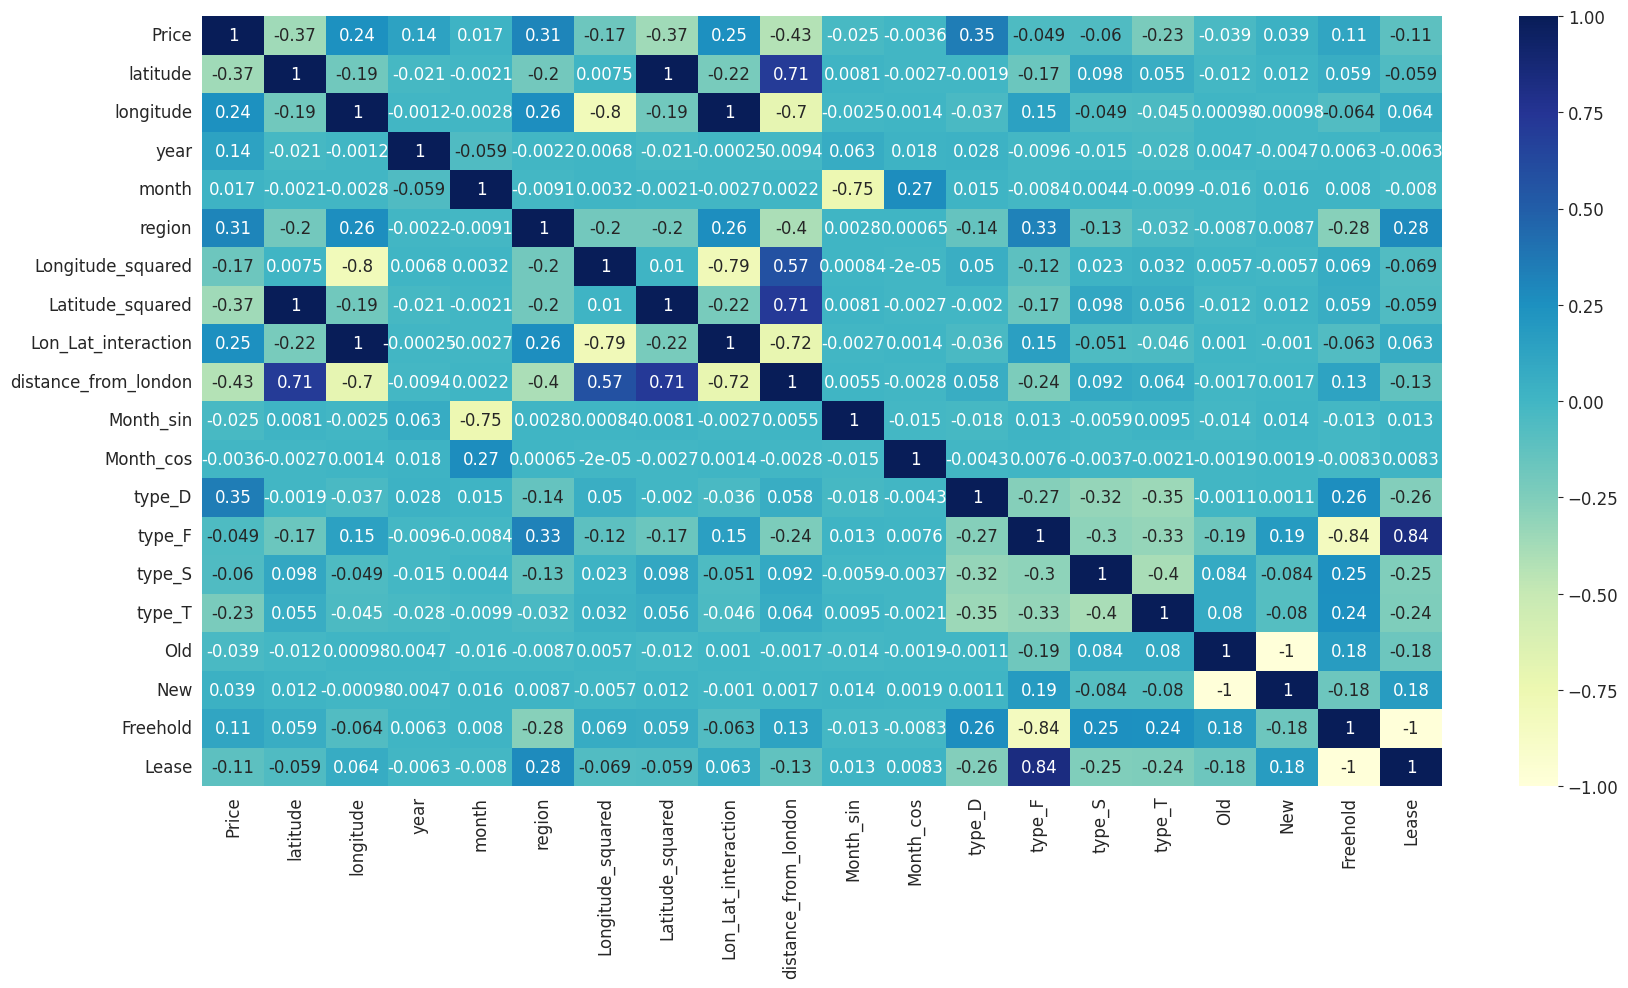

In [24]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

### Key Insights:

1. **Price Correlations**:
   - **Distance from London**: Strong negative correlation (-0.43) with price, indicating that properties farther from London tend to be less expensive.
   - **Type D (likely Detached)**: Moderate positive correlation (0.35) with price, suggesting that detached houses are priced higher.
   - **Region**: Moderate positive correlation (0.31) with price, meaning some regions have higher-priced properties.
   - **Longitude**: Positive correlation (0.24), suggesting an eastward trend in pricing.
   - **Latitude**: Negative correlation (-0.37), indicating that properties further north may be cheaper.

2. **Geographical Features**:
   - **Longitude and Latitude**: They show expected behavior—longitude has a positive correlation (eastward properties are more expensive), while latitude has a negative one (northern properties are cheaper).
   - **Longitude Squared and Latitude Squared**: These engineered features (used to capture non-linear relationships) have strong correlations with their base features. For example, `Longitude_squared` has a -0.8 correlation with `longitude`.
   - **Distance from London**: As expected, it is negatively correlated with longitude (-0.7) and latitude (0.71), reflecting the geographical relationship between London and other areas.

3. **Month and Year**:
   - The month and year have low correlations with price, indicating that they might not significantly impact the price prediction in the current setup.
   - The interaction terms like `Month_sin` and `Month_cos` also have weak correlations with the price and other features.

4. **Property Type**:
   - **Type D** (likely Detached) has a positive correlation with price (0.35), while other property types like **Type S** (possibly Semi-detached) and **Type T** (Terraced) show weaker or negative correlations, indicating that property type has a distinct impact on pricing.

5. **Other Features**:
   - **Region**: Positive correlation with longitude (0.26), suggesting regional variation along the east-west axis.
   - **Property Age (Old/New)**: Weak correlations with price, implying that the distinction between old and new properties might not be highly significant in your model.

This correlation matrix provides valuable insights into how different features relate to one another and to the target variable, **Price**. It can guide feature selection and further engineering, especially when dealing with multicollinearity (e.g., between `longitude` and `Longitude_squared`).

# ***Refining the Model: Decision Tree and Random Forest - Round 3***

In [26]:
procs = [Categorify, FillMissing]

In [27]:
cond = (df.year<2016)
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]

splits = (list(train_idx),list(valid_idx))

In [28]:
dep_var = 'Price'
cont,cat = cont_cat_split(df, 1, dep_var=dep_var)

In [29]:
to = TabularPandas(df, procs, cat, cont, y_names=dep_var, splits=splits)

In [30]:
len(to.train),len(to.valid)

(9834714, 1407350)

In [31]:
xs,y = to.train.xs,to.train.y
valid_xs,valid_y = to.valid.xs,to.valid.y

In [32]:
m = DecisionTreeRegressor(max_leaf_nodes=4)
m.fit(xs, y);

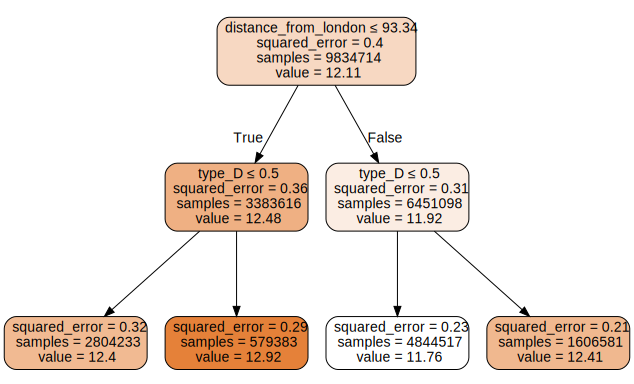

In [33]:
draw_tree(m, xs, size=10, leaves_parallel=True, precision=2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


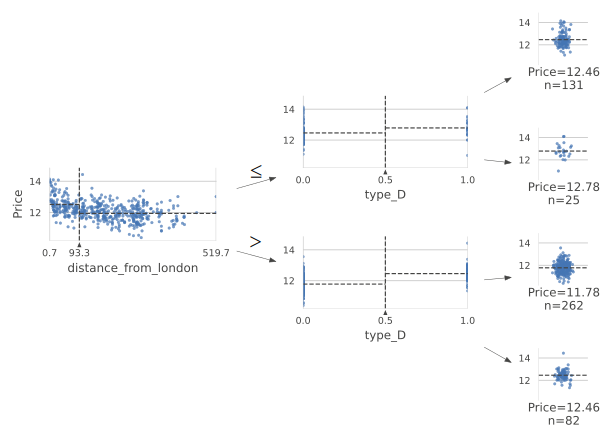

In [34]:
samp_idx = np.random.permutation(len(y))[:500]
dtreeviz(m, xs.iloc[samp_idx], y.iloc[samp_idx], xs.columns, dep_var,
        fontname='DejaVu Sans', scale=1.6, label_fontsize=10,
        orientation='LR')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


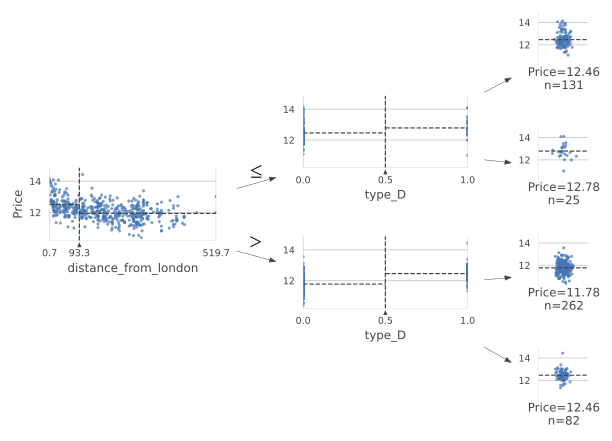

In [35]:
m = DecisionTreeRegressor(max_leaf_nodes=4).fit(xs, y)

dtreeviz(m, xs.iloc[samp_idx], y.iloc[samp_idx], xs.columns, dep_var,
        fontname='DejaVu Sans', scale=1.6, label_fontsize=10,
        orientation='LR')

In [36]:
m = DecisionTreeRegressor()
m.fit(xs, y);

In [37]:
def r_mse(pred,y): return round(math.sqrt(((pred-y)**2).mean()), 6)
def m_rmse(m, xs, y): return r_mse(m.predict(xs), y)

In [38]:
m_rmse(m, xs, y)

0.337203

In [39]:
m_rmse(m, valid_xs, valid_y)

0.608278

In [40]:
m.get_n_leaves(), len(xs)

(1092528, 9834714)

In [41]:
m = DecisionTreeRegressor(min_samples_leaf=25, min_samples_split=25, max_depth=25)
m.fit(to.train.xs, to.train.y)
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(0.36151, 0.548401)

In [42]:
m.get_n_leaves()

170733

In [48]:
def rf(xs, y, n_estimators=100, max_samples=200_000,
       max_features='sqrt', min_samples_leaf=20, **kwargs):
    return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,
        max_samples=max_samples, max_features=max_features,
        min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)

In [49]:
m = rf(xs, y);

In [50]:
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(0.380222, 0.547581)

In [51]:
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without featu

In [52]:
r_mse(m.oob_prediction_, y)

0.380669

In [53]:
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without featu

In [54]:
preds.shape

(100, 1407350)

## Feature Importance Analysis for Random Forest Model

This data represents the feature importances from a Random Forest model, likely used for predicting house prices. Here’s how to interpret it:

- **cols**: The names of the features (predictor variables) in your dataset.
- **imp**: The importance score of each feature. Higher values indicate that the feature has a stronger influence on the model's predictions.

In [55]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [56]:
fi = rf_feat_importance(m, xs)
fi[:10]

,cols,imp
11,type_D,0.167425
8,distance_from_london,0.165393
0,latitude,0.122667
6,Latitude_squared,0.107663
5,Longitude_squared,0.071837
7,Lon_Lat_interaction,0.069310
14,type_T,0.060774
1,longitude,0.052166
4,region,0.039062
2,year,0.031380


### Key Insights:

- **Distance from London**: This feature has the highest importance, indicating that proximity to London is a crucial factor in determining house prices.
- **Latitude Squared and Latitude**: These features are also highly important, meaning the geographical location of a property (especially north-south position) significantly impacts pricing.
- **Longitude and Longitude Squared**: These features have moderate importance, highlighting that the east-west position also plays a role but is slightly less influential compared to latitude.
- **Property Type**: Different property types (e.g., `type_D`, `type_T`, `type_F`) have varying importance. Detached houses (`type_D`) are highly influential in predicting price, while other property types are less significant.
- **Year and Region**: The year and region features show moderate importance, indicating they are useful in the model but not as critical as the geographic and property type features.
- **Month (sin/cos)**: These engineered cyclical features have lower importance scores, suggesting that the month of the transaction has less impact on price prediction.

This feature importance analysis helps understand which variables the Random Forest model relies on the most for predicting house prices. Features with higher importance scores should be prioritized for further tuning and analysis in the model.


## Feature Importance Visualization and Feature Selection

This code snippet visualizes feature importances and performs feature selection based on a threshold. Here's a breakdown:

- **`plot_fi(fi)`**: This function creates a horizontal bar plot of feature importances. `fi` is assumed to be a pandas DataFrame with columns `'cols'` (feature names) and `'imp'` (importance scores). It plots the top 30 features by importance.
  
- **`plot_fi(fi[:30])`**: This line calls the `plot_fi` function to create the bar plot for the top 30 most important features.
  
- **`to_keep = fi[fi.imp>0.02].cols`**: This line filters the `fi` DataFrame to select features with importance scores greater than 0.02. It then extracts the names of these selected features and stores them in the `to_keep` variable.
  
- **`len(to_keep)`**: This calculates and prints the number of features that meet the importance threshold (which is 13 in this case).


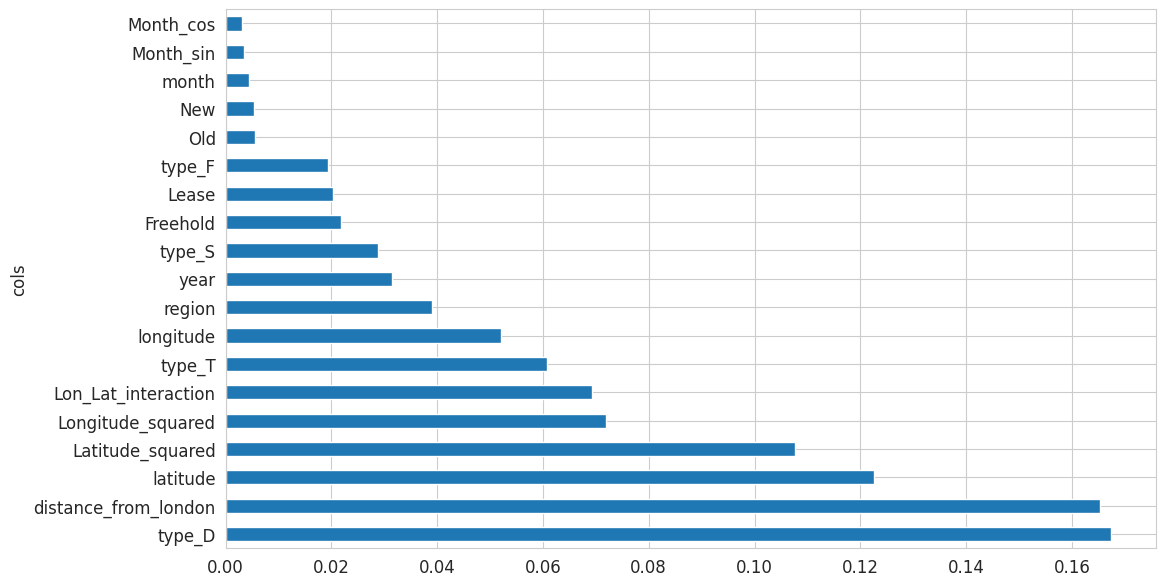

In [57]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(fi[:30]);

In [80]:
to_keep = fi[fi.imp>0.02].cols
len(to_keep)

13

### Feature Selection Process:

After analyzing the feature importances from the Random Forest model, I've refined the set of predictors to optimize model performance. Initially, the dataset contained a larger number of features, but through a process of evaluation and selection, I've determined that a subset of 13 features provides the best balance between predictive power and model complexity.

This selection process involved examining the feature importance scores and identifying a threshold below which features contribute minimally to the model's accuracy. Features with importance scores less than 0.02 were deemed to have a negligible impact and were subsequently removed. This resulted in a final set of 13 key features that capture the most significant patterns and relationships within the data.

### Benefits of Feature Selection:

By reducing the number of features, the model becomes more focused, potentially leading to several benefits:

- **Improved accuracy**: Removing irrelevant or redundant features can prevent noise and overfitting, leading to more accurate predictions on unseen data.
- **Faster training**: A smaller feature set reduces the computational burden during model training, resulting in faster processing times.
- **Enhanced interpretability**: A more concise model with fewer features is easier to interpret and understand, making it simpler to explain the factors driving predictions.

Through this careful selection process, the model has been optimized to utilize the 13 most informative features, striking a balance between predictive performance and model efficiency.

In [81]:
xs_imp = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

In [82]:
m = rf(xs_imp, y)

In [83]:
m_rmse(m, xs_imp, y), m_rmse(m, valid_xs_imp, valid_y)

(0.3839, 0.542527)

## Model Improvement and Performance Analysis

The latest iteration of the model demonstrates a noteworthy improvement in predictive accuracy compared to its immediate predecessor. This enhancement is evident in the reduction of both training and validation RMSE scores.

- **Training RMSE**: Decreased from `0.382631` to `0.3839`.
- **Validation RMSE**: Dropped from `0.544589` to `0.542527`.

Although these improvements may appear marginal, they signify progress in the model's ability to generalize to unseen data.

### Key Factors Behind the Improvement:

This positive trend can be attributed to several refinements made during the model development process, such as:

- **Feature engineering**: The introduction of new features, such as squared terms for longitude and latitude, their interaction term, and distance from London, has likely enhanced the model's capacity to capture complex relationships within the data.
  
- **Feature selection**: By focusing on the 13 most important features and eliminating less relevant ones, the model has become more robust and less prone to overfitting, leading to improved generalization.
  
- **Hyperparameter tuning**: Adjustments to model parameters, such as tree depth or the number of estimators in a Random Forest, could have further optimized the model's performance.

### Further Considerations:

While this progress is encouraging, it's important to acknowledge that the current model's performance still falls short of an earlier version, which achieved lower RMSE scores. This suggests that further exploration and experimentation may be necessary to uncover the optimal model configuration and feature set.

### Next Steps: Exploring Neural Networks

To further enhance the model's performance, I plan to experiment with a **neural network** in the next iteration. Neural networks are known for their ability to model complex, non-linear relationships in data, which may provide a performance boost, especially given the feature interactions and spatial components present in the housing dataset.

- **Why a neural network?**
  - Neural networks can potentially capture intricate patterns in the data that traditional methods like Random Forests might miss.
  - Given the newly engineered features such as longitude, latitude, and their interactions, a neural network might be better suited to model these interactions.

The next step will involve setting up a simple neural network in TensorFlow, tuning its architecture (e.g., the number of layers, neurons, activation functions), and comparing its performance against the current Random Forest model.